In [1]:
import torch
import cv2
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
from torchvision.io import read_image
from torchvision import transforms

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
cnn = efficientnet_v2_s()

In [4]:
cnn

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [5]:
PATH = "./weights/efficientnet_v2_s-dd5fe13b.pth"
cnn.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [6]:
cnn_features = cnn.features

In [10]:
cnn_features

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): FusedMBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
      )
      (stochastic_depth): StochasticDepth(p=0.0, mode=row)
    )
    (1): FusedMBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
      )
      (stochastic_de

In [7]:
cnn_features.eval()

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): FusedMBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
      )
      (stochastic_depth): StochasticDepth(p=0.0, mode=row)
    )
    (1): FusedMBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
      )
      (stochastic_de

In [8]:
torch.cuda.is_available()

False

In [9]:
# device = torch.device('cuda')
# cnn_features.to(device)
# cnn_features.eval()

In [10]:
preprocess = EfficientNet_V2_S_Weights.IMAGENET1K_V1.transforms()

In [11]:
preprocess

ImageClassification(
    crop_size=[384]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [4]:
mypreprocess = transforms.Compose(
    [   
        # transforms.CenterCrop(900),
        # transforms.Resize(2000),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

In [5]:
@torch.no_grad()
def get_embeddings(img):
    img = img.to(torch.float32)
    batch = mypreprocess(img).unsqueeze(0)#preprocess(img).unsqueeze(0)
    features = cnn_features(batch).squeeze(0)
    return features

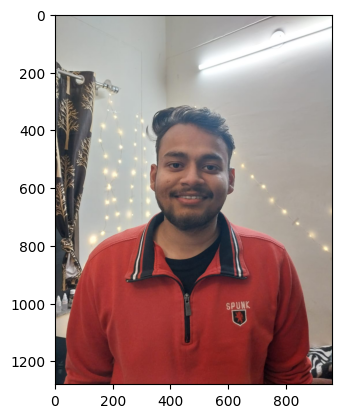

In [6]:
im_path = "student_faces/3.jpeg"
im = read_image(im_path)

import matplotlib.pyplot as plt

plt.imshow(im.permute(1, 2, 0).detach().numpy())
plt.show()

In [7]:
im.shape

torch.Size([3, 1280, 960])

In [8]:
face = detector(im.permute(1, 2, 0).detach().numpy())
plt.imshow(face.permute(0, 2, 3, 1).detach().numpy().astype(np.uint8)[0])
plt.show()
im_featues = get_embeddings(face)
im_featues.shape

NameError: name 'detector' is not defined

NameError: name 'im_featues' is not defined

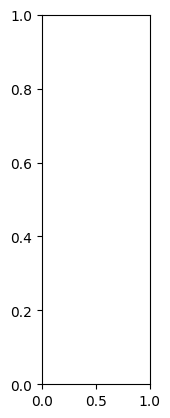

In [9]:
import numpy as np

k = 4
for i in range(k):
    plt.subplot(1, k, i+1)
    map_no = np.random.randint(0, 1280)
    plt.imshow(im_featues[map_no].detach().numpy())
    plt.title(f"Map no. {map_no}")
    plt.axis("off")
plt.show()

In [ ]:
from glob import glob
import os 

images = sorted(glob("student_photos/*.jpeg"))

: 

In [ ]:
EMB_PATH = "student_emb"
for im_path in images:
    im = read_image(im_path)
    emb = get_embeddings(im)
    os.makedirs(EMB_PATH, exist_ok=True)
    filename = im_path.split(os.sep)[-1].split('.')[0] + '.pth'
    torch.save(emb, os.path.join(EMB_PATH, filename))

: 

In [10]:
from facenet_pytorch import MTCNN

detector = MTCNN(margin=35,select_largest=False, post_process=False, device=device, keep_all=True)


/Users/raunavghosh/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#dummy
frame = cv2.imread("./student_faces/5.jpeg", cv2.IMREAD_COLOR)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [12]:
import numpy as np

torch.Size([2, 3, 160, 160])
tensor(248.) tensor(2.)


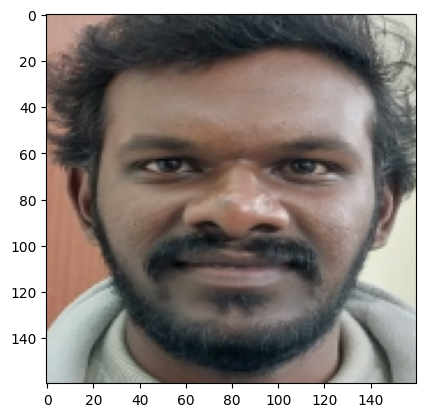

In [13]:
face = detector(frame)

print(face.shape)
print(face.max(), face.min())
plt.imshow(face.permute(0, 2, 3, 1).detach().numpy().astype(np.uint8)[0])
plt.show()

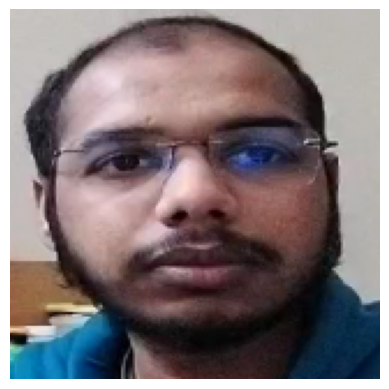

In [14]:
v_cap = cv2.VideoCapture('./class_recordings/2024-02-11.mp4')
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

faces = detector(frame)

if len(faces.shape) == 3:
    faces = faces.unsqueeze(0)

for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face.permute(1, 2, 0).int().numpy())
    plt.axis('off')
plt.show()

In [15]:
int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

885

In [17]:
v_cap = cv2.VideoCapture('./class_recordings/2024-02-11.mp4')
v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Loop through video, taking a handful of frames to form a batch
frames = []
for i in range(v_len):
    
    # Load frame
    ret, frame = v_cap.read()
    # success = v_cap.grab()
    # if i % 50 == 0:
    #     success, frame = v_cap.retrieve()
    # else:
    #     continue
    # if not success:
    #     continue
        
    # Add to batch
    # if i % 100 == 0:
        # cv2.imshow(f"Frame{i}", frame)
        # cv2.waitKey()
        # cv2.destroyAllWindows()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
v_cap.release()

In [18]:
len(frames)

885

In [19]:
frame = frames[800]
cv2.imshow("Frame", frame)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
all_faces = []

for i in range(885):
    frame = frames[i]
    if i % 100 == 0:
        cv2.imshow(f"Frame{i}", frame)
        cv2.waitKey(1000)
        cv2.destroyAllWindows()
    faces = detector(frame)
    if faces is not None:
        if len(faces.shape) == 3:
            faces = faces.unsqueeze(0)
        all_faces.extend(faces)

In [21]:
len(all_faces)

1184

torch.Size([3, 160, 160])


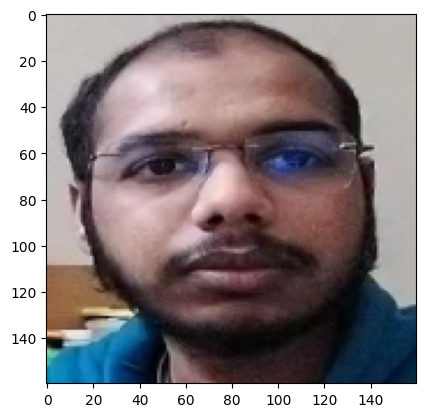

torch.Size([3, 160, 160])


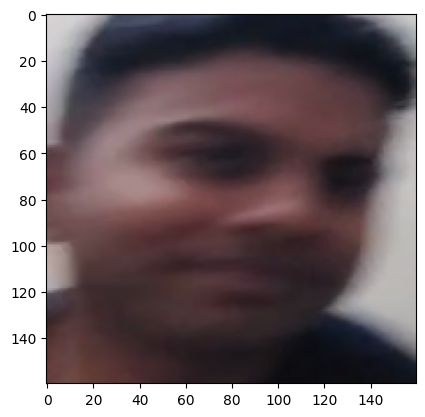

torch.Size([3, 160, 160])


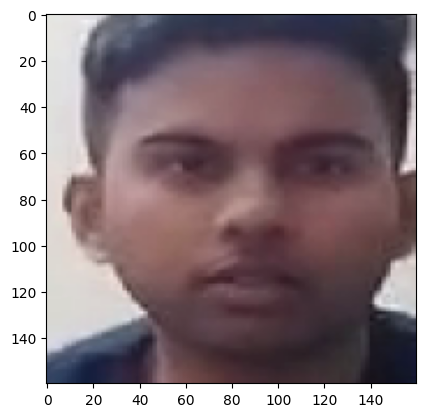

In [25]:
for f in all_faces[::400]:
    print(f.shape)
    plt.imshow(f.permute(1, 2, 0).int().numpy())
    plt.show()
    # cv2.waitKey()
    # cv2.destroyAllWindows()

torch.Size([3, 160, 160])


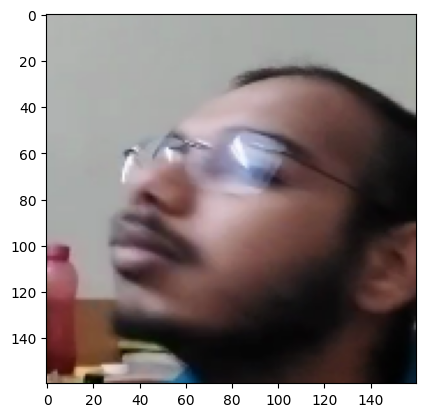

: 

In [29]:
faces = detector(frames[100])

for f in faces:
    print(f.shape)
    plt.imshow(f.permute(1, 2, 0).int().numpy())
    plt.show()
